In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('heart1.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [2]:
x = data.drop(['oldpeak','target'],axis=1)
y = data['target']

In [3]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [4]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [5]:
newData = [[2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0]]
predict = model.predict(newData)
print(predict)


[0]


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [6]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(ytest, ypred, labels=[0, 1])
print("Confusion Matrix we want is: \n", conf)

TP = conf[0][0]
TN = conf[1][1]
FP = conf[1][0]
FN = conf[0][1]

print("True Positives", TP)
print("True Negatives", TN)
print("False Positives", FP)
print("False Negatives", FN)


Confusion Matrix we want is: 
 [[83 15]
 [13 94]]
True Positives 83
True Negatives 94
False Positives 13
False Negatives 15


Text(0.5, 1.0, 'Confusion Matrix')

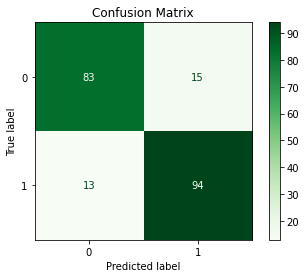

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(conf)
display.plot(cmap="Greens")
plt.title("Confusion Matrix")

In [8]:
from sklearn.metrics import f1_score, precision_score, recall_score, matthews_corrcoef
print(f"Recall Score: {recall_score(ytest, ypred):.3}")
print(f"Specitivity Score: {TN/(TN+FP):.3}")
print(f"Precision Score: {precision_score(ytest, ypred):.3}")
print(f"Negative Prediction Value: {TN/(TN+FN):.3}")
print(f"F1 Score: {f1_score(ytest, ypred):.3}")
print(
    f"Matthews Correlation Coefficient: {matthews_corrcoef(ytest, ypred):.3}")


Recall Score: 0.879
Specitivity Score: 0.879
Precision Score: 0.862
Negative Prediction Value: 0.862
F1 Score: 0.87
Matthews Correlation Coefficient: 0.726


Area under the curve:  0.8627217242037001


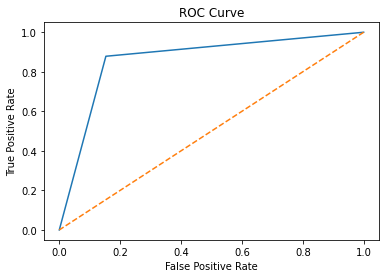

In [9]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(ytest, ypred)
area = auc(fpr, tpr)
print("Area under the curve: ", area)
plt.plot(fpr, tpr)
plt.plot([1, 0], [1, 0], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
